In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer


In [35]:
df = pd.read_csv('/content/gdrive/MyDrive/475 lab/cleaned_merged_heart_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [37]:
X = df.drop(columns=['target'])
y = df['target']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 1510
Number of testing samples: 378


In [39]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       182
           1       0.97      0.99      0.98       196

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378



In [40]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       182
           1       0.94      0.93      0.94       196

    accuracy                           0.93       378
   macro avg       0.93      0.93      0.93       378
weighted avg       0.93      0.93      0.93       378



In [41]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]


meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

meta_learner = LogisticRegression()


stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)

Stacking Model Accuracy: 0.9761904761904762


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fea...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [42]:
vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)
vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))


Voting Classifier Accuracy: 0.9629629629629629


In [43]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

stack_pred = stacking_model.predict(X_test)

from sklearn.ensemble import VotingClassifier
vote_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
], voting='hard')
vote_clf.fit(X_train, y_train)
vote_pred = vote_clf.predict(X_test)

print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
print("Stacking Model:", accuracy_score(y_test, stack_pred))
print("Voting Classifier:", accuracy_score(y_test, vote_pred))


Random Forest: 0.9841269841269841
Gradient Boosting: 0.9338624338624338
Stacking Model: 0.9761904761904762
Voting Classifier: 0.9814814814814815


In [44]:
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        final_estimator=LogisticRegression(random_state=42)
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        voting='soft'
    )
}

results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.9662 ± 0.0095
Gradient Boosting Cross-Validation Accuracy: 0.9219 ± 0.0058
Stacking Cross-Validation Accuracy: 0.9669 ± 0.0105
Voting Cross-Validation Accuracy: 0.9477 ± 0.0057


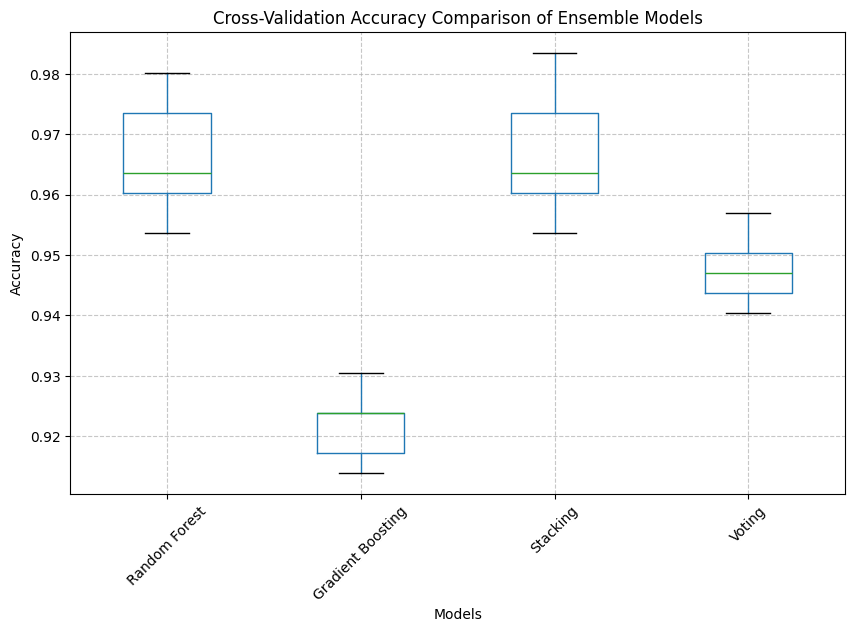

Note: If the box plot shows perfect accuracy across all models (flat line around 1.0),
it might indicate overfitting or that the dataset is too simple.


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Note: If the box plot shows perfect accuracy across all models (flat line around 1.0),")
print("it might indicate overfitting or that the dataset is too simple.")


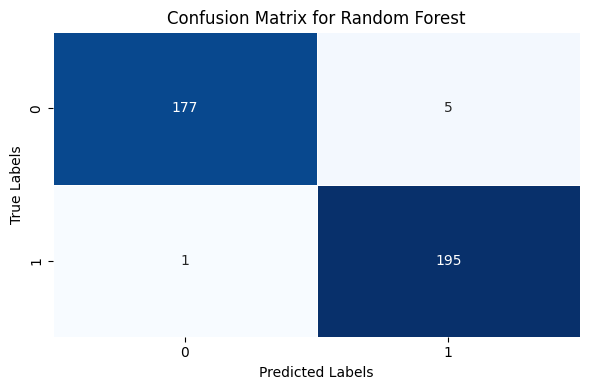

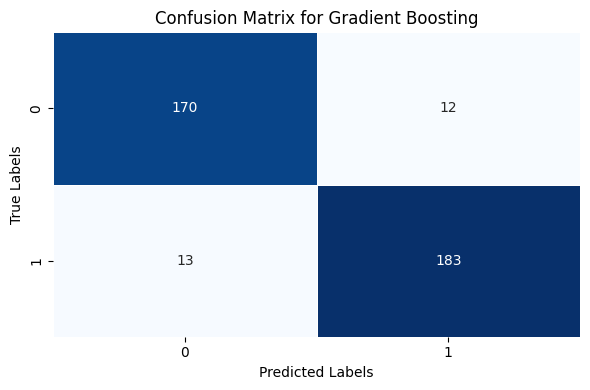

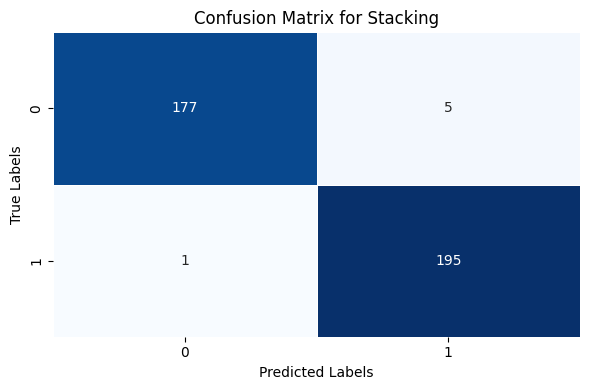

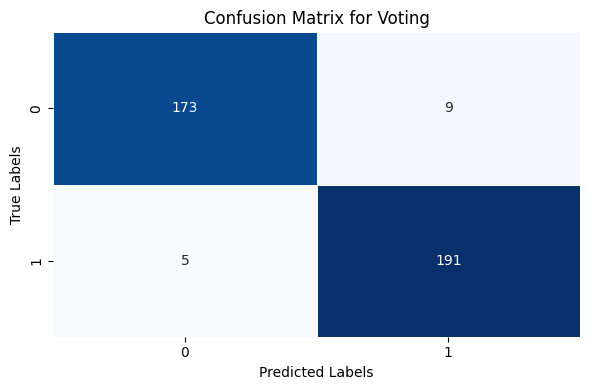

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for model_name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    cm = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

for model_name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")


Random Forest Performance Metrics:
 - Precision: 0.9843
 - Recall: 0.9841
 - F1 Score: 0.9841

Gradient Boosting Performance Metrics:
 - Precision: 0.9339
 - Recall: 0.9339
 - F1 Score: 0.9339

Stacking Performance Metrics:
 - Precision: 0.9843
 - Recall: 0.9841
 - F1 Score: 0.9841

Voting Performance Metrics:
 - Precision: 0.9631
 - Recall: 0.9630
 - F1 Score: 0.9629



In [48]:

metrics_summary = []

for model_name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)


print("Model Performance Summary:")
print(metrics_df)


Model Performance Summary:
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.984127   0.984332  0.984127  0.984119
1  Gradient Boosting  0.933862   0.933888  0.933862  0.933868
2           Stacking  0.984127   0.984332  0.984127  0.984119
3             Voting  0.962963   0.963142  0.962963  0.962944


In [49]:
import shap

X_sample = X_test.sample(100, random_state=42)

explainer = shap.TreeExplainer(models["Random Forest"])

shap_values = explainer.shap_values(X_sample)

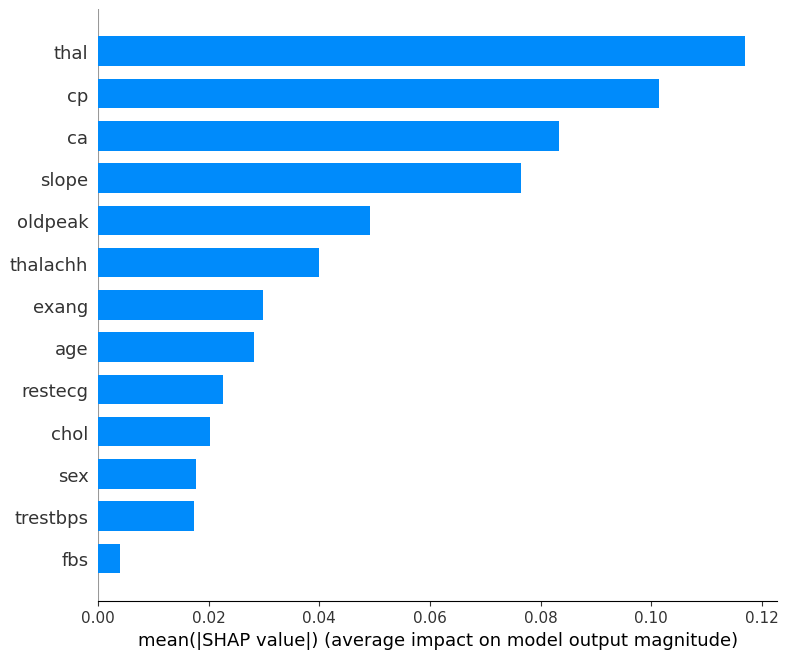

In [50]:
import numpy as np
mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)  # Resulting shape should be (100, 12) to match X_sample
mean_shap_values = np.mean(mean_shap_values, axis=1)
mean_shap_values_repeated = np.tile(mean_shap_values, (X_sample.shape[0], 1))
shap.summary_plot(mean_shap_values_repeated, X_sample, plot_type="bar", feature_names=X_sample.columns)


In [51]:
!pip install lime

In [52]:
from lime.lime_tabular import LimeTabularExplainer

class_names = [str(label) for label in np.unique(y_train)]

lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=class_names,
    mode='classification'
)

sample_index = 0


exp = lime_explainer.explain_instance(
    X_test.values[sample_index],
    models["Random Forest"].predict_proba,
    num_features=10
)


print(f"Test Sample: {X_test.iloc[sample_index].to_dict()}")
exp.show_in_notebook(show_table=True, show_all=False)


Test Sample: {'age': 59.0, 'sex': 1.0, 'cp': 1.0, 'trestbps': 140.0, 'chol': 221.0, 'fbs': 0.0, 'restecg': 1.0, 'thalachh': 164.0, 'exang': 1.0, 'oldpeak': 0.0, 'slope': 2.0, 'ca': 0.0, 'thal': 2.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
